# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2018-CS109A/blob/master/content/styles/iacs.png?raw=true"> CS109A Introduction to Data Science 

## Lab 2: Pandas and Web Scraping with Beautiful Soup

**Harvard University**<br>
**Fall 2019**<br>
**Instructors:** Pavlos Protopapas, Kevin Rader, and Chris Tanner<br>
**Lab Instructors:** Chris Tanner and Eleni Kaxiras <br>
**Authors:** Rahul Dave, David Sondak, Will Claybaugh, Pavlos Protopapas, Chris Tanner, Eleni Kaxiras

---

In [1]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
from IPython.core.display import HTML
def css_styling():
    styles = open("../../../styles/cs109.css", "r").read()
    return HTML(styles)
css_styling()

# Table of Contents 
<ol start="0">
<li> Learning Goals </li>
<li> Loading and Cleaning with Pandas</li>
<li> Parsing and Completing the Dataframe  </li>
<li> Grouping </li>
</ol>

## Learning Goals

About 6,000 odd "best books" were fetched and parsed from [Goodreads](https://www.goodreads.com). The "bestness" of these books came from a proprietary formula used by Goodreads and published as a list on their web site.

We parsed the page for each book and saved data from all these pages in a tabular format as a CSV file. In this lab we'll clean and further parse the data.  We'll then do some exploratory data analysis to answer questions about these best books and popular genres.  


By the end of this lab, you should be able to:

- Load and systematically address missing values, ancoded as `NaN` values in our data set, for example, by removing observations associated with these values.
- Parse columns in the dataframe to create new dataframe columns.
- Use groupby to aggregate data on a particular feature column, such as author.

*This lab corresponds to lectures #1, #2, and #3 and maps on to homework #1 and further.*

### Basic EDA workflow

(From the lecture, repeated here for convenience).

The basic workflow is as follows:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Let us see what issues we find with the data and resolve them.  



----




After loading appropriate libraries


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.

In [3]:
#Read the data into a dataframe
df = pd.read_csv("../data/goodreads.csv", encoding='utf-8')

#Examine the first few rows of the dataframe
df.head(10)

,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.Suzanne_Collins,2008,/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
0,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
1,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
2,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
3,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice
4,4.25,12363,0446675539,good_reads:book,https://www.goodreads.com/author/show/11081.Ma...,1936.0,/genres/classics|/genres/historical-fiction|/g...,dir01/18405.Gone_with_the_Wind.html,645470,Gone with the Wind
5,4.22,7205,0066238501,good_reads:book,https://www.goodreads.com/author/show/1069006....,1949.0,/genres/classics|/genres/young-adult|/genres/c...,dir01/11127.The_Chronicles_of_Narnia.html,286677,The Chronicles of Narnia (Chronicles of Narnia...
6,4.38,10902,0060256656,good_reads:book,https://www.goodreads.com/author/show/435477.S...,1964.0,/genres/childrens|/genres/young-adult|/genres/...,dir01/370493.The_Giving_Tree.html,502891,The Giving Tree
7,3.79,20670,0452284244,good_reads:book,https://www.goodreads.com/author/show/3706.Geo...,1945.0,/genres/classics|/genres/fiction|/genres/scien...,dir01/7613.Animal_Farm.html,1364879,Animal Farm
8,4.18,12302,0345391802,good_reads:book,https://www.goodreads.com/author/show/4.Dougla...,1979.0,/genres/science-fiction|/genres/humor|/genres/...,dir01/11.The_Hitchhiker_s_Guide_to_the_Galaxy....,724713,The Hitchhiker's Guide to the Galaxy (Hitchhik...
9,4.03,20937,0739326228,good_reads:book,https://www.goodreads.com/author/show/614.Arth...,1997.0,/genres/fiction|/genres/historical-fiction|/ge...,dir01/930.Memoirs_of_a_Geisha.html,1042679,Memoirs of a Geisha


Oh dear. That does not quite seem to be right. We are missing the column names. We need to add these in! But what are they?

Here is a list of them in order:

`["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name']`

<div class="exercise"><b>Exercise</b></div>
Use these to load the dataframe properly! And then "head" the dataframe... (you will need to look at the read_csv docs)


In [4]:
# your code here
df=pd.read_csv("../data/goodreads.csv", header=None,
               names=["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'],
)

#Examine the first few rows of the dataframe
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content. 

<div class="exercise"><b>Exercise</b></div>
Lets check the types of the columns. What do you find?

In [5]:
# your code here
####### 
df.dtypes
####### 


rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

*your answer here*

Notice that `review_count` and `rating_counts` are objects instead of ints, and the `year` is a float!

There are a couple more quick sanity checks to perform on the dataframe. 

In [6]:
print(df.shape)
df.columns

(6000, 10)


Index(['rating', 'review_count', 'isbn', 'booktype', 'author_url', 'year', 'genre_urls', 'dir', 'rating_count', 'name'], dtype='object')

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

Let's see for a column which seemed OK to us.

In [7]:
missing_cols = {col: np.sum(df[col].isna()) for col in df.columns}
missing_cols

{'rating': 2,
 'review_count': 0,
 'isbn': 475,
 'booktype': 0,
 'author_url': 0,
 'year': 7,
 'genre_urls': 62,
 'dir': 0,
 'rating_count': 0,
 'name': 0}

In [8]:
#Get a sense of how many missing values there are in the dataframe.
print(np.sum([df.rating.isnull()]))
print(np.sum([df.review_count.isnull()]))
print(np.sum([df.isbn.isnull()]))
print(np.sum([df.booktype.isnull()]))
print(np.sum([df.author_url.isnull()]))
print(np.sum([df.year.isnull()]))
print(np.sum([df.genre_urls.isnull()]))
print(np.sum([df.dir.isnull()]))
print(np.sum([df.rating_count.isnull()]))
print(np.sum([df.name.isnull()]))

2
0
475
0
0
7
62
0
0
0


In [9]:
#Try to locate where the missing values occur
df[df.rating.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None


In [11]:
# 'None' is treated as a regular string, not as missing value
# replace 'None' with np.nan, so it is treated as a missing value
df_cleaned = df.replace('None', np.nan)
missing_cols_cleaned = {col: np.sum(df_cleaned[col].isna()) for col in df_cleaned.columns}
missing_cols_cleaned

{'rating': 2,
 'review_count': 2,
 'isbn': 477,
 'booktype': 2,
 'author_url': 2,
 'year': 7,
 'genre_urls': 62,
 'dir': 0,
 'rating_count': 2,
 'name': 2}

How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

We'll now check if any of the other suspicious columns have missing values.  Let's look at `year` and `review_count` first.

One thing you can do is to try and convert to the type you expect the column to be. If something goes wrong, it likely means your data are bad.

Lets test for missing data:

In [12]:
df[df.year.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2442,4.23,526,NaN,good_reads:book,https://www.goodreads.com/author/show/623606.A...,NaN,/genres/religion|/genres/islam|/genres/non-fic...,dir25/1301625.La_Tahzan.html,4134,La Tahzan
2869,4.61,2,NaN,good_reads:book,https://www.goodreads.com/author/show/8182217....,NaN,NaN,dir29/22031070-my-death-experiences---a-preach...,23,My Death Experiences - A Preacherâs 18 Apoca...
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None
5572,3.71,35,8423336603,good_reads:book,https://www.goodreads.com/author/show/285658.E...,NaN,/genres/fiction,dir56/890680._rase_una_vez_el_amor_pero_tuve_q...,403,Ãrase una vez el amor pero tuve que matarlo. ...
5658,4.32,44,NaN,good_reads:book,https://www.goodreads.com/author/show/25307.Ro...,NaN,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir57/5533041-assassin-s-apprentice-royal-assa...,3850,Assassin's Apprentice / Royal Assassin (Farsee...
5683,4.56,204,NaN,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,/genres/fantasy|/genres/young-adult|/genres/ro...,dir57/12474623-tiger-s-dream.html,895,"Tiger's Dream (The Tiger Saga, #5)"


### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? 

In [13]:
#Treat the missing or invalid values in your dataframe
####### 

df = df[df.year.notnull()]

Ok so we have done some cleaning. What do things look like now? Notice the float has not yet changed.

In [14]:
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

In [15]:
print(np.sum(df.year.isnull()))
df.shape # We removed seven rows

0


(5993, 10)

<div class="exercise"><b>Exercise</b></div>

Ok so lets fix those types. Convert them to ints. If the type conversion fails, we now know we have further problems.

In [16]:
# your code here
df.rating_count=df.rating_count.astype(int)
df.review_count=df.review_count.astype(int)
df.year=df.year.astype(int)

Once you do this, we seem to be good on these columns (no errors in conversion). Lets look:

In [17]:
df.dtypes

rating          float64
review_count      int32
isbn             object
booktype         object
author_url       object
year              int32
genre_urls       object
dir              object
rating_count      int32
name             object
dtype: object

Sweet!

Some of the other colums that should be strings have NaN.

In [18]:
df.loc[df.genre_urls.isnull(), 'genre_urls']=""
df.loc[df.isbn.isnull(), 'isbn']=""

##  Part 2: Parsing and Completing the Data Frame 

We will parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

We will use panda's `map` to assign new columns to the dataframe.  

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [19]:
#Get the first author_url
test_string = df.author_url[0]
test_string

'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [20]:
test_string.split('/')[-1].split('.')[-1]

'Suzanne_Collins'

In [21]:
#Test out some string operations to isolate the author name

test_string.split('/')[-1].split('.')[1:][0]

'Suzanne_Collins'

In [22]:
df['author'] = df['author_url'].map(lambda x: x.split('/')[-1].split('.')[1:][0])

<div class="exercise"><b>Exercise</b></div>

Lets wrap the above code into a function which we will then use

In [23]:
# Write a function that accepts an author url and returns the author's name based on your experimentation above
def get_author(url):
    # your code here
    name = url.split('/')[-1].split('.')[1:][0]
    ####### 
    return name

In [24]:
#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)
df.author[0:5]

0    Suzanne_Collins
1        J_K_Rowling
2    Stephenie_Meyer
3         Harper_Lee
4        Jane_Austen
Name: author, dtype: object

<div class="exercise"><b>Exercise</b></div>

Now parse out the genres from `genre_url`.  

This is a little more complicated because there be more than one genre.


In [25]:

df.genre_urls.head()

0    /genres/young-adult|/genres/science-fiction|/g...
1    /genres/fantasy|/genres/young-adult|/genres/fi...
2    /genres/young-adult|/genres/fantasy|/genres/ro...
3    /genres/classics|/genres/fiction|/genres/histo...
4    /genres/classics|/genres/fiction|/genres/roman...
Name: genre_urls, dtype: object

In [26]:
df['genres'] = df['genre_urls'].str.replace('/genres/', '')

In [ ]:
# your code here
#Examine some examples of genre_urls

#Test out some string operations to isolate the genre name
test_genre_string=df.genre_urls[0]
genres=test_genre_string.strip().split('|')
for e in genres:
    print(e.split('/')[-1])
    "|".join(genres)

<div class="exercise"><b>Exercise</b></div>

Write a function that accepts a genre url and returns the genre name based on your experimentation above



In [ ]:
def split_and_join_genres(url):
    # your code here
    genres=url.strip().split('|')
    genres=[e.split('/')[-1] for e in genres]
    return "|".join(genres)

Test your function

In [ ]:
split_and_join_genres("/genres/young-adult|/genres/science-fiction")

In [ ]:
split_and_join_genres("")

<div class="exercise"><b>Exercise</b></div>

Use map again to create a new "genres" column

In [ ]:

df['genres']=df.genre_urls.map(split_and_join_genres)
df.head()

Finally, let's pick an author at random so we can see the results of the transformations.  Scroll to see the `author` and `genre` columns that we added to the dataframe.

In [27]:
df[df.author == "Marguerite_Yourcenar"]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres
1014,4.23,483,0374529264,good_reads:book,https://www.goodreads.com/author/show/7732.Mar...,1951,/genres/historical-fiction|/genres/fiction|/ge...,dir11/12172.Memoirs_of_Hadrian.html,6258,Memoirs of Hadrian,Marguerite_Yourcenar,historical-fiction|fiction|cultural|france|cla...
5620,4.11,74,2070367983,good_reads:book,https://www.goodreads.com/author/show/7732.Mar...,1968,/genres/fiction|/genres/historical-fiction|/ge...,dir57/953435.L_uvre_au_noir.html,1601,L'Åuvre au noir,Marguerite_Yourcenar,fiction|historical-fiction|cultural|france|eur...


Let us delete the `genre_urls` column.

In [28]:
del df['genre_urls']

And then save the dataframe out!

In [ ]:
df.to_csv("data/cleaned-goodreads.csv", index=False, header=True)

---

In [29]:
# drop 'author_url' column
df.drop(columns=['author_url'], inplace=True)
df.head()

,rating,review_count,isbn,booktype,year,dir,rating_count,name,author,genres
0,4.40,136455,0439023483,good_reads:book,2008,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,young-adult|science-fiction|dystopia|fantasy|s...
1,4.41,16648,0439358078,good_reads:book,2003,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...
2,3.56,85746,0316015849,good_reads:book,2005,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,young-adult|fantasy|romance|paranormal|vampire...
3,4.23,47906,0061120081,good_reads:book,1960,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper_Lee,classics|fiction|historical-fiction|academic|s...
4,4.23,34772,0679783261,good_reads:book,1813,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane_Austen,classics|fiction|romance|historical-fiction|li...


## Part 3: Grouping 

It appears that some books were written in negative years!  Print out the observations that correspond to negative years.  What do you notice about these books?  

In [30]:
# your code here
df[df.year < 0].name
#These are books written before the Common Era (BCE, equivalent to BC).

47                               The Odyssey
246                    The Iliad/The Odyssey
455                             The Republic
596                               The Aeneid
629                              Oedipus Rex
674                           The Art of War
746                        The Bhagavad Gita
777                                 Antigone
1233                       The Oedipus Cycle
1397                          Aesop's Fables
1398                   The Epic of Gilgamesh
1428                                   Medea
1815                            The Oresteia
1882         The Trial and Death of Socrates
2078    The History of the Peloponnesian War
2527                           The Histories
3133                          Complete Works
3274                  The Nicomachean Ethics
3757                              Lysistrata
4402                           The Symposium
4475                                 Apology
5367                          Five Dialogues
Name: name

We can determine the "best book" by year! For this we use Panda's `groupby()`. `Groupby()` allows grouping a dataframe by any (usually categorical) variable. Would it make sense to ever groupby integer variables? Floating point variables?

year
-1500    1
-800     2
-560     1
-512     1
-500     1
Name: year, dtype: int64


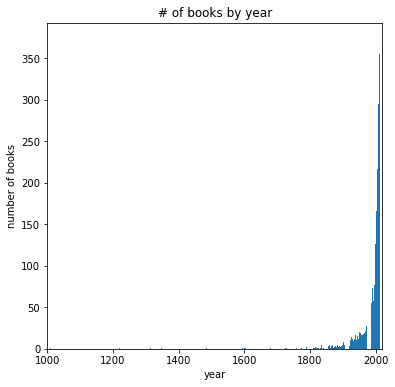

In [33]:
# number of books by year
dfgb_year = df.groupby('year')['year'].count()
print(dfgb_year[:5])
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.bar(dfgb_year.index, dfgb_year.values)
ax.set_xlabel('year')
ax.set_xlim([1000, 2020])
ax.set_ylabel('number of books')
ax.set_title('# of books by year')
plt.show();

In [39]:
# best book by year
dfgb_year = df.groupby('year')['rating', 'name', 'author'].max()
print(dfgb_year)

       rating                                               name                 author
year                                                                                   
-1500    3.60                              The Epic of Gilgamesh              Anonymous
-800     4.01                                        The Odyssey                  Homer
-560     4.03                                     Aesop's Fables                  Aesop
-512     3.92                                     The Art of War                Sun_Tzu
-500     4.06                                  The Bhagavad Gita              Anonymous
-458     3.96                                       The Oresteia              Aeschylus
-442     3.52                                           Antigone              Sophocles
-440     3.94                                      The Histories              Herodotus
-431     3.80                                              Medea              Euripides
-429     3.64                   

In [37]:
dfgb_author = df.groupby('author')
type(dfgb_author), type(dfgb_author['year'])

(pandas.core.groupby.generic.DataFrameGroupBy,
 pandas.core.groupby.generic.SeriesGroupBy)

Perhaps we want the number of books each author wrote

In [40]:
dfgb_author.count().head()

,rating,review_count,isbn,booktype,year,dir,rating_count,name,genres
author,,,,,,,,,
A_A_Milne,6,6,6,6,6,6,6,6,6
A_G_Howard,1,1,1,1,1,1,1,1,1
A_J_Cronin,1,1,1,1,1,1,1,1,1
A_J_Jacobs,1,1,1,1,1,1,1,1,1
A_J_Salt,1,1,1,1,1,1,1,1,1


Lots of useless info there. One column should suffice

### Exercise:

- Group the dataframe by `author`. Include the following columns: `rating`, `name`, `author`. For the aggregation of the `name` column which includes the names of the books create a list with the strings containing the name of each book. Make sure that the way you aggregate the rest of the columns make sense! 

- Create a new column with number of books for each author and find the most prolific author!

In [41]:
dfgb_author = df.groupby('author')['rating', 'name'].aggregate({'rating': np.mean, 'name': '|'.join})
authors = dfgb_author.reset_index()
authors['name'] = authors['name'].str.split('|')
authors['num_books'] = authors['name'].map(len)
authors.sort_values(by='num_books', ascending=False, inplace=True)
authors.head()

,author,rating,name,num_books
2349,Stephen_King,3.918750,"[The Stand, The Shining (The Shining #1), It, ...",56
2640,_,3.988095,"[Ø¹Ø²Ø§Ø²ÙÙ, Ø«ÙØ§Ø«ÙØ© ØºØ±ÙØ§Ø·Ø©, ØªØ±...",42
2429,Terry_Pratchett,4.103415,"[Good Omens, Night Watch (Discworld, #29), Sma...",41
1745,Meg_Cabot,3.890000,"[The Princess Diaries (The Princess Diaries, #...",33
1494,Laurell_K_Hamilton,3.954815,"[Guilty Pleasures (Anita Blake, Vampire Hunter...",27


In [ ]:
###### Before we start : what do we do about these titles where 'name' is unreadable? Try different encodings?
auth_name = 'A_id_al_Qarni'
df[df.author == auth_name].head()

In [ ]:
df[df.author == auth_name].iat[0,8].encode('UTF-16')

In [ ]:
# let's examine the columns we have
df.columns

Create the GroupBy table

In [ ]:
authors = df.copy()
authors = authors[['rating','name','author']].groupby('author').agg({'rating' : np.mean,
                                                                    'name' : '|'.join})

In [ ]:
authors = authors.reset_index()
authors.head()

In [ ]:
# split the column string and make a list of string book names
authors['name'] = authors.name.str.split('|')
authors.head()

In [ ]:
# count the books - create new column
len(authors.name[0])

In [ ]:
authors['num_books'] = authors['name'].str.len()
authors

In [ ]:
# sort for more prolific
authors.sort_values(by='num_books', ascending=False).iloc[0]

#### Winner is Stephen King with 56 books! OMG!!!

Perhaps you want more detailed info...

In [ ]:
df.groupby('author')['rating', 'rating_count', 'review_count', 'year'].describe()

You can also access a `groupby` dictionary style.

In [ ]:
ratingdict = {}
for author, subset in dfgb_author:
    ratingdict[author] = (subset['rating'].mean(), subset['rating'].std())
ratingdict

<div class="exercise"><b>Exercise</b></div>

Lets get the best-rated book(s) for every year in our dataframe.

In [ ]:
#Using .groupby, we can divide the dataframe into subsets by the values of 'year'.
#We can then iterate over these subsets
# your code here
for year, subset in df.groupby('year'):
    #Find the best book of the year

    bestbook = subset[subset.rating == subset.rating.max()]
    if bestbook.shape[0] > 1:
        print(year, bestbook.name.values, bestbook.rating.values)
    else:
        print(year, bestbook.name.values[0], bestbook.rating.values[0])